<a href="https://colab.research.google.com/github/YoheiFukuhara/pattern-recognition/blob/master/01_02_%E9%AB%98%E6%AC%A1%E5%85%83%E7%A9%BA%E9%96%93%E3%81%AB%E3%81%8A%E3%81%91%E3%82%8B%E8%B7%9D%E9%9B%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# 乱数シードを指定
np.random.seed(0)
# サンプル数を指定
n_samples = 10000
# 次元数は2の累乗とする(0乗〜14乗)
n_dimensions = [2 ** i for i in range(15)]
# 答えを格納するリストを初期化
ratios = []
maxes = []
minima = []

In [0]:
%%time
# 各次元について繰り返し処理
for dim in n_dimensions:
    # 標準正規分布に従うn_samples×dimの2次元配列数値データを取得
    data = np.random.randn(n_samples, dim)
    # 代表点の配列インデックスを決める
    index = np.random.randint(0, n_samples - 1)
    # 各サンプルと代表点とのL2ノルム(ユークリッド距離)を算出
    distances = np.linalg.norm(data - data[index], ord=2, axis=1)
    
    # 代表点と代表点との距離は必ず0となるので削除
    distances = np.delete(distances, index)
    # 最大・最小を取得
    max_ = np.max(distances)
    min_ = np.min(distances)
    # 最大と最小の差の比を算出し、リストに追加
    ratios.append((max_ - min_) / min_)
    maxes.append(max_)
    minima.append(min_)
    print(dim, '\t', max_, '\t', min_, '\t', (max_ - min_) / min_)

1 	 5.359172545164386 	 0.00035299117213050124 	 15181.171590350972
2 	 5.831315425079145 	 0.005934462363393213 	 981.6189919157075
4 	 5.905205651543053 	 0.18828165461006646 	 30.36368045932464
8 	 7.2553317629094645 	 0.8538000326494812 	 7.497694407898981
16 	 8.840701987368139 	 2.304191325670082 	 2.836791627881497
32 	 11.58621761444893 	 5.068926036688435 	 1.2857342029828251
64 	 14.899525977988406 	 7.738465451937276 	 0.9253850870728386
128 	 19.58528969136541 	 12.983120392436335 	 0.5085194544429662
256 	 25.65295326375792 	 18.4717844504555 	 0.3887642167200221
512 	 36.36043720561854 	 29.655835956103306 	 0.22608033236491498
1024 	 48.31260962868733 	 41.26863564105555 	 0.1706858944622869
2048 	 67.66436563679383 	 61.23071827171184 	 0.10507221778017743
4096 	 93.80693694417424 	 87.39825273425338 	 0.07332737222341693
8192 	 131.04963618645095 	 124.79133964233239 	 0.050150087033728676
16384 	 183.58080781699545 	 177.250869105564 	 0.03571174992468769
CPU times: u

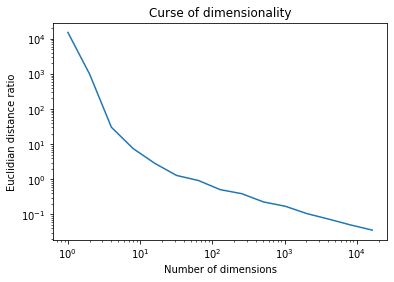

In [0]:
# 横軸=次元数、縦軸=最大と最小の差の比で両軸対数折れ線グラフを表示
plt.title('Curse of dimensionality')
plt.xlabel('Number of dimensions')
plt.ylabel('Euclidian distance ratio')
plt.xscale('log')
plt.yscale('log')
plt.plot(n_dimensions, ratios)

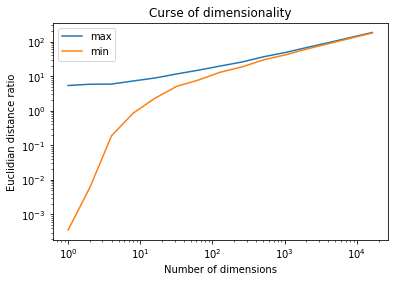

In [0]:
# 横軸=次元数、縦軸=最大と最小を両軸対数折れ線グラフ表示
plt.title('Curse of dimensionality')
plt.xlabel('Number of dimensions')
plt.ylabel('Euclidian distances')
plt.xscale('log')
plt.yscale('log')
plt.plot(n_dimensions, maxes, label='max')
plt.plot(n_dimensions, minima, label='min')
plt.legend()